## Decision Tree
[Sklearn Link]('http://scikit-learn.org/stable/modules/tree.html')

In [30]:
import sys
from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import numpy as np
import pylab as pl

### 1. Generate decision tree classifier model and visularize it

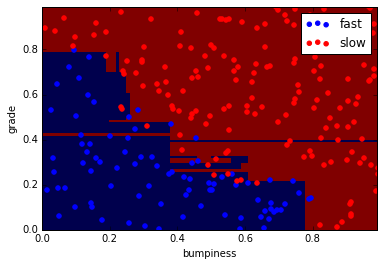

In [56]:
# import data
features_train, labels_train, features_test, labels_test = makeTerrainData()


#### train model
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)


#### grader code
prettyPicture(clf, features_test, labels_test)

### 2. Calculate the accuracy

In [36]:
### compute the accuracy on the test set
from sklearn.metrics import accuracy_score

acc = accuracy_score(labels_test, clf.predict(features_test))

print "The test accuracy is: ", acc

The test accuracy is:  0.912


### 3. Decision tree parameters

DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_split=1e-07, class_weight=None, presort=False)

In [93]:
# find the best min_sample_split
splits = [2,10, 20, 50]
accuracys = {}

for split in splits:
    clf = DecisionTreeClassifier(min_samples_split=split)
    clf = clf.fit(features_train, labels_train)
    accuracys[split] = round(accuracy_score(labels_test, clf.predict(features_test)),3)

### sort the dictionary by value descending and then by key ascending
sorted_acc =  sorted(accuracys.items(), key=lambda x: (-x[1], x[0]), reverse=False)

print sorted_acc
print "The best split is {0} and the accuracy under this condition is {1}".format(sorted_acc[0][0], sorted_acc[0][1])

[(20, 0.924), (10, 0.912), (50, 0.912), (2, 0.908)]
The best split is 20 and the accuracy under this condition is 0.924


In [92]:
depths = [2,4, 6, 8,10,16, 30]
accuracys = {}

for depth in depths:
    clf = DecisionTreeClassifier(min_samples_split=20, max_depth=depth)
    clf = clf.fit(features_train, labels_train)
    accuracys[depth] = round(accuracy_score(labels_test, clf.predict(features_test)), 3)

### sort the dictionary by value descending and then by key ascending
sorted_acc =  sorted(accuracys.items(), key=lambda x: (-x[1], x[0]), reverse=False)
print sorted_acc
print "The best depth is {0} and the accuracy under this condition is {1}".format(sorted_acc[0][0], sorted_acc[0][1])

[(6, 0.924), (8, 0.924), (10, 0.924), (16, 0.924), (30, 0.924), (4, 0.92), (2, 0.848)]
The best depth is 6 and the accuracy under this condition is 0.924


### 4. Impurity - Entropy and Information Gain

Entropy - controls how a DT decides where to split the data. It is a measure of impurity in a bunch of examples. Entropy equals 0 means lowest impurity, all examples are same class. ntropy equals 1.0 means highest impurity, all examples are evenly split between classes.

Information gain = parent entropy - weighted average children entropy

Decision tree algorithm: maximize information gain

Q1: calculate parent (speed) entropy 



|  grade    |   bumpiness   |   speed limit  |   speed       |
|-----------|:--------------|:---------------|:--------------|
| steep     |    bumpy      |         yes    |     slow      |
| steep     |   smooth      |         yes    |     slow      |
|  flat     |    bumpy      |          no    |     fast      |
| steep     |   smooth      |          no    |     fast      |

Q2: calculate information gain when splitting by speed and then splitting by grade

![pic](InformationGain.png)

In [97]:
# Q1
from math import log

Pslow = 1/2.0; Pfast = 1/ 2.0
print "The entropy for speed is {}".format(-Pslow * log(Pslow, 2) - Pfast * log(Pfast,2))

The entropy for speed is 1.0


In [101]:
# Q2

# node ssf entropy : Pslow = 2/3, Pfast = 1/3
ent_ssf = (-2/3.0 * log(2/3.0, 2) - 1/3.0 * log(1/3.0,2))

# node f entropy
ent_f = 0

# weighted average of children entropy: weight for ssf node is 3/4 and for f is 1/4

wt_child_ent = 3/4.0*(ent_ssf) + 1/4.0 * ent_f

ig = 1 - wt_child_ent
print "The information gain is {}".format(round(ig,3))

The information gain is 0.311


### 5. prons and cons

prons: easy to use and easy to interprete, can be used for  continuous and categorical inputs.

cons: prone to overfitting, especially you have a lot of features and have a complicated decision tree it can overfit the data.
So it is important to stop the tree at a propriate time